In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0324.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0874.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0360.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0551.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0590.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0857.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0374.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0928.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0528.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0129.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0577.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/

In [3]:
import os
import tensorflow as tf

In [4]:
path_fire_train = "/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire"
loc_fire_train = []
for x in os.listdir(path_fire_train):
    loc_fire_train.append(path_fire_train + "/" + x)
loc_fire_train[:10]

['/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0341.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0946.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0805.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0007.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0577.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0218.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0843.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0669.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0159.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire/fire_0328.jpg']

In [5]:
path_nofire_train = "/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire"
loc_nofire_train = []
for x in os.listdir(path_nofire_train):
    loc_nofire_train.append(path_nofire_train + "/" + x)
loc_nofire_train[:10]

['/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0324.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0874.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0360.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0551.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0590.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0857.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0374.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0928.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0528.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0129.jpg']

In [6]:
path_test = "/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/"
loc_fire_test = []
loc_nofire_test = []
for x in os.listdir(path_test):
    if x.startswith("fire"):
        loc_fire_test.append(path_test + x)
    if x.startswith("nofire"):
        loc_nofire_test.append(path_test + x)

In [7]:
loc_fire_test[:10]

['/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0234.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0280.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0569.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0822.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0599.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0743.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0630.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0845.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0497.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0038.jpg']

In [8]:
loc_nofire_test[:10]

['/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0295.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0372.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0555.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0246.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0112.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0701.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0800.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0787.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0400.jpg',
 '/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/nofire_0730.jpg']

In [9]:
import matplotlib.pyplot as plt
def show_20_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(20):
        ax=plt.subplot(4,5,i+1)
        plt.imshow(images[i])
        plt.title(labels)
        plt.axis("off")

In [10]:
import tensorflow as tf
def process_image(image_path, IMG_SIZE=224):
    """
    Takes image path and returns the image as tensors
    """
    #Read in an image file
    image= tf.io.read_file(image_path)

    #Turn jpg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image=tf.io.decode_jpeg(image, channels=3)

    # Convert the colour channel values from 0-255 to 0-1 values
    image= tf.image.convert_image_dtype(image, tf.float32)

    #Resize the image to (224,224)
    image=tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image

In [11]:
tensor_fire_train = []
for i in loc_fire_train:
    tensor_fire_train.append(process_image(i))

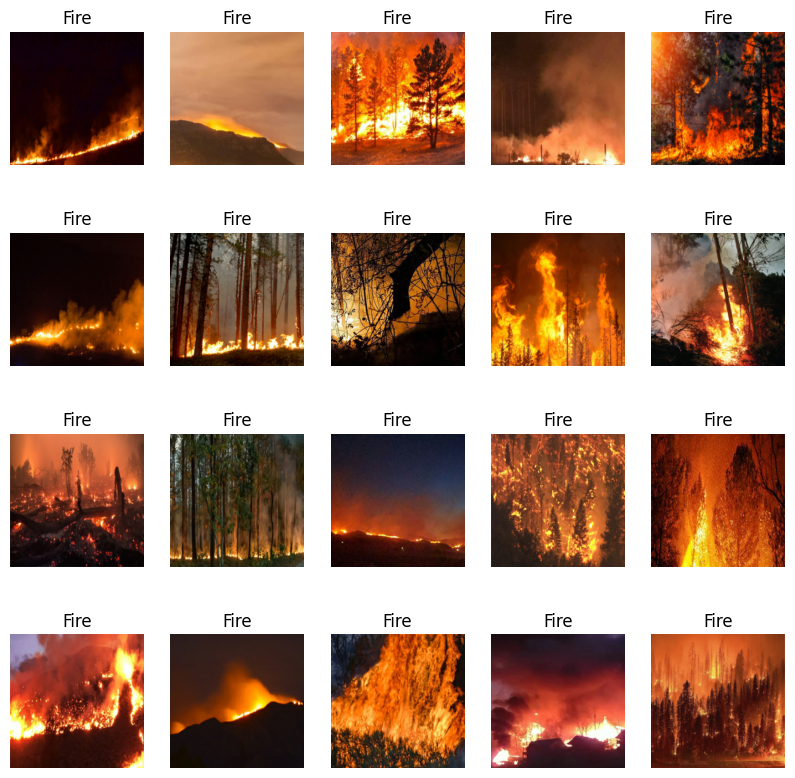

In [12]:
show_20_images(tensor_fire_train, labels = 'Fire')

In [13]:
tensor_nofire_train = []
for i in loc_nofire_train:
    tensor_nofire_train.append(process_image(i))

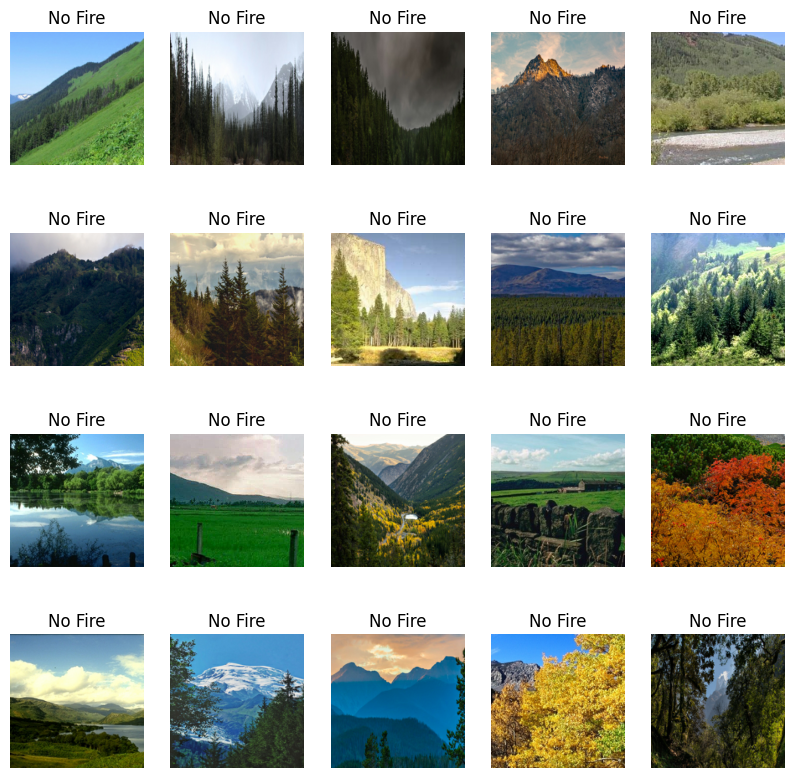

In [14]:
show_20_images(tensor_nofire_train, labels = 'No Fire')

In [15]:
labels = [0] * 760 + [1] * 760

In [16]:
train_data = tensor_nofire_train

In [17]:
train_data.extend(tensor_fire_train)

In [18]:
len(train_data), len(labels)

(1520, 1520)

In [19]:
labels = tf.constant(labels)

In [20]:
train_data = np.array(train_data)
labels = np.array(labels)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, labels, test_size=0.2)

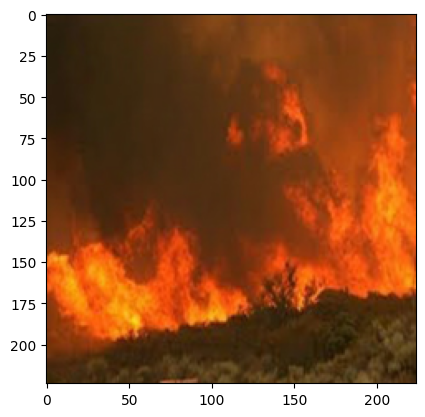

In [50]:
plt.imshow(train_data[-10])

In [23]:
labels[-10]

1

In [24]:
model = tf.keras.models.load_model("/kaggle/input/keras-model-base/keras_model.h5")

In [25]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_11 (Sequential)  (None, 2)                 128300    
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 538,511
Trainable params: 524,431
Non-trainable params: 14,080
_________________________________________________________________


In [27]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will stop
    verbose=1,           # Print messages
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)

In [32]:
model.fit(x = X_train,
         y = y_train.reshape(1216,1),
         validation_data = (X_val, y_val.reshape(304,1)),
         epochs = 50, batch_size=32, 
         callbacks = [early_stopping])

Epoch 1/50
38/38 [==============================] - 3s 77ms/step - loss: 0.4627 - accuracy: 0.8775 - val_loss: 0.5207 - val_accuracy: 0.7829
Epoch 2/50
38/38 [==============================] - 2s 61ms/step - loss: 0.3917 - accuracy: 0.9424 - val_loss: 0.6077 - val_accuracy: 0.6711
Epoch 3/50
38/38 [==============================] - 2s 60ms/step - loss: 0.3595 - accuracy: 0.9655 - val_loss: 0.4981 - val_accuracy: 0.7993
Epoch 4/50
38/38 [==============================] - 2s 59ms/step - loss: 0.3558 - accuracy: 0.9605 - val_loss: 0.5922 - val_accuracy: 0.6908
Epoch 5/50
38/38 [==============================] - 2s 60ms/step - loss: 0.3474 - accuracy: 0.9581 - val_loss: 0.6448 - val_accuracy: 0.6382
Epoch 6/50
38/38 [==============================] - 2s 61ms/step - loss: 0.3478 - accuracy: 0.9523 - val_loss: 0.6761 - val_accuracy: 0.6118
Epoch 7/50
38/38 [==============================] - 2s 62ms/step - loss: 0.3205 - accuracy: 0.9688 - val_loss: 0.5765 - val_accuracy: 0.7138
Epoch 8/50
38

In [30]:
# model.save("keras_on_3&2.h5")

Exception ignored in: <function _xla_gc_callback at 0x7dc0ac895ab0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [33]:
model_demo = tf.keras.models.load_model("/kaggle/input/keras-model-base/keras_model.h5")

In [34]:
model_demo.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model_demo.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_demo = EarlyStopping(
    monitor='val_accuracy',  # Monitor the validation loss
    patience=15,         # Number of epochs with no improvement after which training will stop
    verbose=1,           # Print messages
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)

In [48]:
model_demo.fit(x = X_train,
         y = y_train.reshape(1216,1),
         validation_data = (X_val, y_val.reshape(304,1)),
         epochs = 50, batch_size=32, 
         callbacks = [early_stopping_demo])

Epoch 1/50
38/38 [==============================] - 3s 82ms/step - loss: 0.3279 - accuracy: 0.9400 - val_loss: 0.8504 - val_accuracy: 0.5197
Epoch 2/50
38/38 [==============================] - 2s 63ms/step - loss: 0.3029 - accuracy: 0.9548 - val_loss: 0.8833 - val_accuracy: 0.5000
Epoch 3/50
38/38 [==============================] - 2s 62ms/step - loss: 0.2915 - accuracy: 0.9572 - val_loss: 0.8809 - val_accuracy: 0.5099
Epoch 4/50
38/38 [==============================] - 3s 75ms/step - loss: 0.2718 - accuracy: 0.9679 - val_loss: 0.8809 - val_accuracy: 0.5164
Epoch 5/50
38/38 [==============================] - 2s 60ms/step - loss: 0.2494 - accuracy: 0.9811 - val_loss: 0.8946 - val_accuracy: 0.5132
Epoch 6/50
38/38 [==============================] - 2s 64ms/step - loss: 0.2653 - accuracy: 0.9638 - val_loss: 0.9165 - val_accuracy: 0.5033
Epoch 7/50
38/38 [==============================] - 2s 63ms/step - loss: 0.2401 - accuracy: 0.9803 - val_loss: 0.8299 - val_accuracy: 0.5691
Epoch 8/50
38

In [49]:
model_demo.save("trial3.h5")

In [89]:
tensor_fire_test = []
for i in loc_fire_test:
    tensor_fire_test.append(process_image(i))

In [90]:
tensor_nofire_test = []
for i in loc_nofire_test:
    tensor_nofire_test.append(process_image(i))

In [91]:
test_data = tensor_fire_test

In [93]:
test_data.extend(tensor_nofire_test)

In [94]:
len(test_data), len(tensor_fire_test), len(tensor_nofire_test) 

(380, 380, 190)

In [106]:
labels_test = [1]*190 + [0]*190

In [107]:
labels_test = np.array(labels)

In [98]:
test_data = np.array(test_data)

In [99]:
y_preds = model_demo.predict(test_data)

12/12 [==============================] - 1s 46ms/step


In [100]:
y_preds

array([[0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.13151354],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.13151354],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.13151354],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.86004233],
       [0.860

In [101]:
y_preds_bol = y_preds > 0.5

In [105]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [108]:
accuracy_score(y_preds_bol, labels_test)

0.968421052631579

In [109]:
precision_score(y_preds_bol, labels_test)

0.9473684210526315

In [110]:
f1_score(y_preds_bol, labels_test)

0.967741935483871

In [111]:
recall_score(y_preds_bol, labels_test)

0.989010989010989

In [120]:
from sklearn.metrics import confusion_matrix

In [126]:
cf = confusion_matrix(y_preds_bol, labels_test)

Text(95.72222222222221, 0.5, 'True Labels')

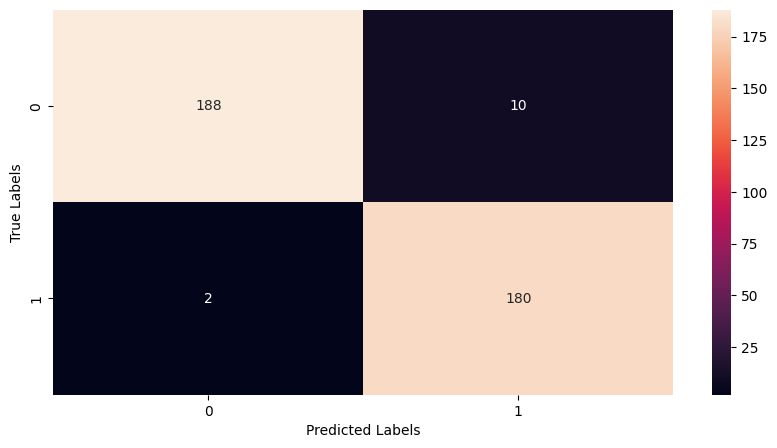

In [129]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cf, annot=True, fmt='d')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [113]:
y_preds_22 = model.predict(test_data)

12/12 [==============================] - 1s 20ms/step


In [115]:
y_preds_22 = y_preds_22>0.5

In [116]:
accuracy_score(y_preds_22, labels_test)

0.9342105263157895

In [117]:
precision_score(y_preds_22, labels_test)

0.9473684210526315

In [118]:
f1_score(y_preds_22, labels_test)

0.935064935064935

In [119]:
recall_score(y_preds_22, labels_test)

0.9230769230769231